In [20]:
# Dependencies
import requests
import json
import pprint
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import DBSCAN

In [28]:
# Initialize the base URL and the initial parameters
base_url = 'https://services.arcgis.com/S9th0jAJ7bqgIRjw/ArcGIS/rest/services/Major_Crime_Indicators_Open_Data/FeatureServer/0/query'
params = {
    'where': 'OCC_YEAR=2023',
    'outFields': '*',
    'resultRecordCount': 2000,
    'resultOffset': 0,
    'f': 'geojson'
}
# Create an empty list to store all the results
all_data_2023 = []
# Start the loop to paginate through the results
while True:
    response = requests.get(base_url, params=params).json()
    # Add the current batch of features to the list
    all_data_2023.extend(response['features'])
    # Check if 'exceededTransferLimit' is True, which means there are more records
    if 'properties' in response and response['properties'].get('exceededTransferLimit', False):
        # Increment the offset to get the next batch of records
        params['resultOffset'] += params['resultRecordCount']
    else:
        # Exit the loop if there are no more records to retrieve
        break

In [29]:
divisions = []

# Loop through each feature to extract the 'DIVISION' value
for feature in all_data_2023:
    division = feature['properties']['DIVISION']
    divisions.append(division)

# Create a pandas DataFrame with the extracted 'DIVISION' values
df = pd.DataFrame(divisions, columns=['DIVISION'])

# Get the unique 'DIVISION' values and their counts
division_counts_2023 = df['DIVISION'].value_counts().reset_index()

# Rename the columns
division_counts_2023.columns = ['DIVISION', 'Count']

# Display the new DataFrame
division_counts_2023.head(17)

,DIVISION,Count
0,D32,4362
1,D22,4236
2,D31,3707
3,D51,3459
4,D55,3342
5,D23,3340
6,D41,3074
7,D43,3047
8,D53,3034
9,D42,2961


In [30]:
Neighborhoods = []

# Loop through each feature to extract the 'DIVISION' value
for feature in all_data_2023:
    Neighborhood = feature['properties']['NEIGHBOURHOOD_140']
    Neighborhoods.append(Neighborhood)

# Create a pandas DataFrame with the extracted 'DIVISION' values
df = pd.DataFrame(Neighborhoods, columns=['Neighborhood'])

# Get the unique 'DIVISION' values and their counts
Neighborhood_counts_2023 = df['Neighborhood'].value_counts().reset_index()

# Rename the columns
Neighborhood_counts_2023.columns = ['Neighborhood', 'Count']

# Display the new DataFrame
Neighborhood_counts_2023

,Neighborhood,Count
0,Waterfront Communities-The Island (77),1770
1,West Humber-Clairville (1),1510
2,Church-Yonge Corridor (75),1457
3,Islington-City Centre West (14),1158
4,Downsview-Roding-CFB (26),1145
...,...,...
136,Old East York (58),108
137,Guildwood (140),92
138,Humber Heights-Westmount (8),92
139,Lambton Baby Point (114),73


In [31]:
# Initialize the base URL and the initial parameters
base_url = 'https://services.arcgis.com/S9th0jAJ7bqgIRjw/ArcGIS/rest/services/Major_Crime_Indicators_Open_Data/FeatureServer/0/query'
params = {
    'where': 'OCC_YEAR=2022',
    'outFields': '*',
    'resultRecordCount': 2000,
    'resultOffset': 0,
    'f': 'geojson'
}
# Create an empty list to store all the results
all_data_2022 = []
# Start the loop to paginate through the results
while True:
    response = requests.get(base_url, params=params).json()
    # Add the current batch of features to the list
    all_data_2022.extend(response['features'])
    # Check if 'exceededTransferLimit' is True, which means there are more records
    if 'properties' in response and response['properties'].get('exceededTransferLimit', False):
        # Increment the offset to get the next batch of records
        params['resultOffset'] += params['resultRecordCount']
    else:
        # Exit the loop if there are no more records to retrieve
        break

In [32]:
divisions = []

# Loop through each feature to extract the 'DIVISION' value
for feature in all_data_2022:
    division = feature['properties']['DIVISION']
    divisions.append(division)

# Create a pandas DataFrame with the extracted 'DIVISION' values
df = pd.DataFrame(divisions, columns=['DIVISION'])

# Get the unique 'DIVISION' values and their counts
division_counts_2022 = df['DIVISION'].value_counts().reset_index()

# Rename the columns
division_counts_2022.columns = ['DIVISION', 'Count']

# Display the new DataFrame
division_counts_2022.head(17)

,DIVISION,Count
0,D32,3680
1,D55,3325
2,D22,3204
3,D51,3204
4,D31,3062
5,D23,2901
6,D14,2729
7,D43,2636
8,D53,2596
9,D41,2497


In [33]:
Neighborhoods = []

# Loop through each feature to extract the 'DIVISION' value
for feature in all_data_2022:
    Neighborhood = feature['properties']['NEIGHBOURHOOD_140']
    Neighborhoods.append(Neighborhood)

# Create a pandas DataFrame with the extracted 'DIVISION' values
df = pd.DataFrame(Neighborhoods, columns=['Neighborhood'])

# Get the unique 'DIVISION' values and their counts
Neighborhood_counts_2022 = df['Neighborhood'].value_counts().reset_index()

# Rename the columns
Neighborhood_counts_2022.columns = ['Neighborhood', 'Count']

# Display the new DataFrame
Neighborhood_counts_2022

,Neighborhood,Count
0,Waterfront Communities-The Island (77),1704
1,Church-Yonge Corridor (75),1333
2,West Humber-Clairville (1),1303
3,Bay Street Corridor (76),893
4,Downsview-Roding-CFB (26),863
...,...,...
136,Pleasant View (46),90
137,Humber Heights-Westmount (8),80
138,Woodbine-Lumsden (60),75
139,Bayview Woods-Steeles (49),64


In [34]:
# Initialize the base URL and the initial parameters
base_url = 'https://services.arcgis.com/S9th0jAJ7bqgIRjw/ArcGIS/rest/services/Major_Crime_Indicators_Open_Data/FeatureServer/0/query'
params = {
    'where': 'OCC_YEAR=2021',
    'outFields': '*',
    'resultRecordCount': 2000,
    'resultOffset': 0,
    'f': 'geojson'
}
# Create an empty list to store all the results
all_data_2021 = []
# Start the loop to paginate through the results
while True:
    response = requests.get(base_url, params=params).json()
    # Add the current batch of features to the list
    all_data_2021.extend(response['features'])
    # Check if 'exceededTransferLimit' is True, which means there are more records
    if 'properties' in response and response['properties'].get('exceededTransferLimit', False):
        # Increment the offset to get the next batch of records
        params['resultOffset'] += params['resultRecordCount']
    else:
        # Exit the loop if there are no more records to retrieve
        break

In [35]:
divisions = []

# Loop through each feature to extract the 'DIVISION' value
for feature in all_data_2021:
    division = feature['properties']['DIVISION']
    divisions.append(division)

# Create a pandas DataFrame with the extracted 'DIVISION' values
df = pd.DataFrame(divisions, columns=['DIVISION'])

# Get the unique 'DIVISION' values and their counts
division_counts_2021 = df['DIVISION'].value_counts().reset_index()

# Rename the columns
division_counts_2021.columns = ['DIVISION', 'Count']

# Display the new DataFrame
division_counts_2021.head(17)

,DIVISION,Count
0,D51,3553
1,D32,2799
2,D55,2747
3,D31,2738
4,D14,2456
5,D53,2227
6,D41,2222
7,D23,2169
8,D22,2168
9,D43,2144


In [36]:
Neighborhoods = []

# Loop through each feature to extract the 'DIVISION' value
for feature in all_data_2021:
    Neighborhood = feature['properties']['NEIGHBOURHOOD_140']
    Neighborhoods.append(Neighborhood)

# Create a pandas DataFrame with the extracted 'DIVISION' values
df = pd.DataFrame(Neighborhoods, columns=['Neighborhood'])

# Get the unique 'DIVISION' values and their counts
Neighborhood_counts_2021 = df['Neighborhood'].value_counts().reset_index()

# Rename the columns
Neighborhood_counts_2021.columns = ['Neighborhood', 'Count']

# Display the new DataFrame
Neighborhood_counts_2021

,Neighborhood,Count
0,Waterfront Communities-The Island (77),1557
1,Church-Yonge Corridor (75),1478
2,West Humber-Clairville (1),958
3,Moss Park (73),920
4,Bay Street Corridor (76),769
...,...,...
136,Maple Leaf (29),62
137,Princess-Rosethorn (10),59
138,Guildwood (140),54
139,Woodbine-Lumsden (60),53


In [37]:
# Rename the 'Count' column in each DataFrame to specify the year
Neighborhood_counts_2021 = Neighborhood_counts_2021.rename(columns={'Count': 'Count_2021'})
Neighborhood_counts_2022 = Neighborhood_counts_2022.rename(columns={'Count': 'Count_2022'})
Neighborhood_counts_2023 = Neighborhood_counts_2023.rename(columns={'Count': 'Count_2023'})

# Merge the DataFrames on 'Neighborhood'
combined_df = pd.merge(Neighborhood_counts_2021, Neighborhood_counts_2022, on='Neighborhood', how='outer')
combined_df = pd.merge(combined_df, Neighborhood_counts_2023, on='Neighborhood', how='outer')

# Display the combined DataFrame
combined_df.head(
)


,Neighborhood,Count_2021,Count_2022,Count_2023
0,Waterfront Communities-The Island (77),1557,1704,1770
1,Church-Yonge Corridor (75),1478,1333,1457
2,West Humber-Clairville (1),958,1303,1510
3,Moss Park (73),920,806,889
4,Bay Street Corridor (76),769,893,1058


In [38]:
# Create the features (X) and target (y)
X = combined_df[['Count_2021', 'Count_2022', 'Count_2023']]  # Features
y = combined_df['Count_2023']  # Target (in this case, let's assume we are trying to predict based on 2023, but in production, this would be Count_2024)


In [39]:
# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# Initialize the Random Forest Regressor
model = RandomForestRegressor()

# Train the model on the training data
model.fit(X_train, y_train)


RandomForestRegressor()

In [41]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the predicted crime counts for the test set
print("Predicted crime counts for 2023 (test set):", y_pred)


Predicted crime counts for 2023 (test set): [ 250.97  159.09  377.57  325.46  175.11  225.67  216.29  184.92  110.99
  631.99  442.61  238.44  534.97  202.37  151.89   83.32  507.    115.84
 1030.86  126.69  227.11  191.12  164.12  156.4   290.1  1054.71  241.48
  510.25  235.92]


In [53]:
# Calculate the Mean Squared Error (MSE) and R-squared (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"mean absolute error: {mae}")


Mean Squared Error: 585.6852000000007
R-squared: 0.9910837135507261
mean absolute error: 7.569655172413793


In [43]:
# Predict crime counts for 2024 based on the full dataset (using all data points)
Count_2024_pred = model.predict(X)

# Add the predictions to the DataFrame
combined_df['Count_2024'] = Count_2024_pred

# Display the DataFrame with the predicted crime counts for 2024
combined_df.head(15)


,Neighborhood,Count_2021,Count_2022,Count_2023,Count_2024
0,Waterfront Communities-The Island (77),1557,1704,1770,1621.90
1,Church-Yonge Corridor (75),1478,1333,1457,1460.28
2,West Humber-Clairville (1),958,1303,1510,1428.11
3,Moss Park (73),920,806,889,974.47
4,Bay Street Corridor (76),769,893,1058,1054.71
5,Downsview-Roding-CFB (26),757,863,1145,1069.95
6,York University Heights (27),680,805,1018,993.04
7,NSA,592,721,486,520.88
8,Annex (95),583,678,745,744.14
9,Kensington-Chinatown (78),569,622,753,735.42


In [44]:
# Select the features for clustering
X_cluster = combined_df[['Count_2021', 'Count_2022', 'Count_2023']]



In [45]:

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


In [46]:
dbscan = DBSCAN()

In [47]:
dbscan.fit(X_scaled)

DBSCAN()

In [48]:
clusters = dbscan.labels_

In [49]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 13


In [50]:
combined_df['Cluster_DBSCAN'] = clusters

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


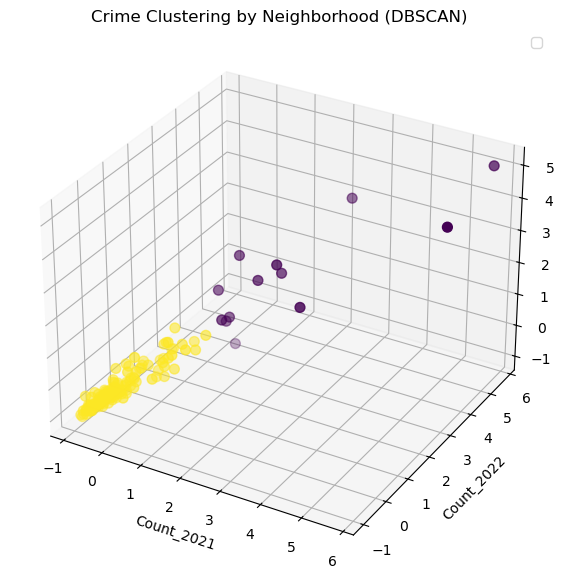

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot of the clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster with a different color (-1 will be for outliers)
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=clusters, cmap='viridis', s=50)

# Add labels
ax.set_xlabel('Count_2021')
ax.set_ylabel('Count_2022')
ax.set_zlabel('Count_2023')
ax.legend(loc='best')
plt.title('Crime Clustering by Neighborhood (DBSCAN)')
plt.show()
